In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [33]:
train=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test=pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [35]:
#
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [36]:
print(len(train))
train.isnull().sum()

8693


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [37]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Percentile meaning.....
(Age).........................Same meaning for others
75% people are 38 or younger
50% people are 27 or younger

In [38]:
# cant use function for visualisn here as except Age all num hav very diff vals
# cay=tegorical also notworking

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<AxesSubplot:xlabel='Age', ylabel='Count'>

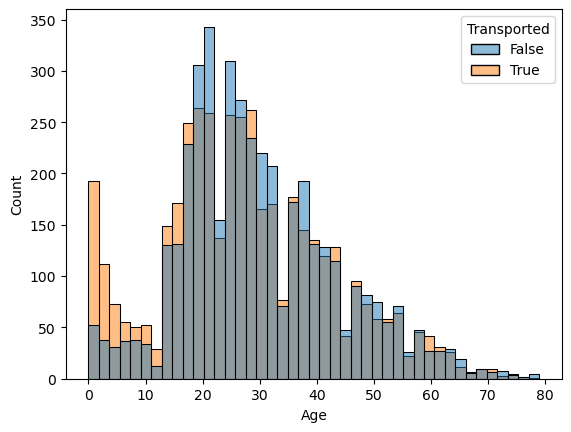

In [40]:
sns.histplot(data=train,x=train['Age'],hue=train['Transported'])

- below 18 cnfrm transported 

<AxesSubplot:xlabel='Age', ylabel='Count'>

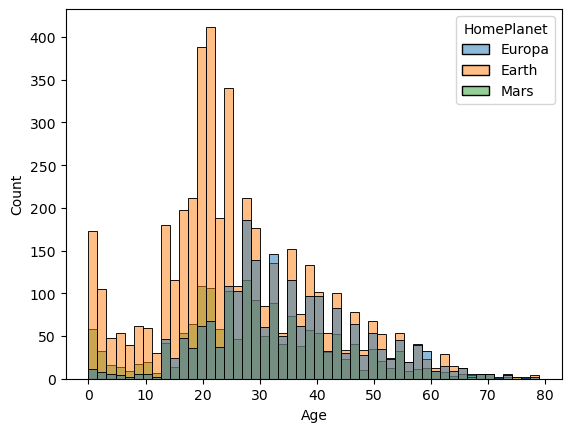

In [41]:
sns.histplot(data=train,x=train['Age'],hue=train['HomePlanet'],bins=50,)

-Transported is numerical ie it is in Boolean so need to convert is to Categorical

In [42]:
def impute_val(col):
    if col==True:
        return 'true'
    elif col== False:
        return 'false'

In [43]:
train['Transported']= train['Transported'].apply(impute_val)

In [44]:
train['Transported'].head()

0    false
1     true
2    false
3    false
4     true
Name: Transported, dtype: object

- function for categorical ddnt work

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

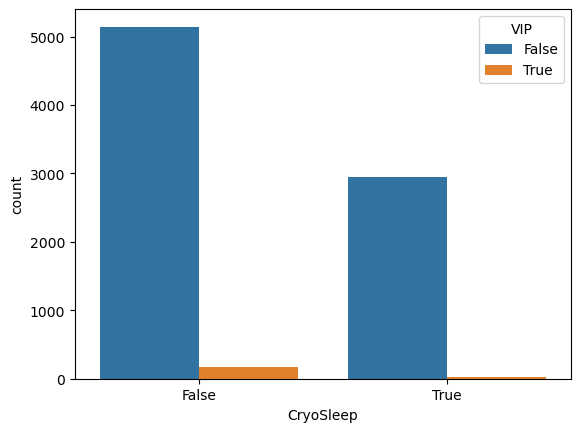

In [45]:
sns.countplot(data=train,x=train['CryoSleep'],hue=train['VIP'])

<AxesSubplot:xlabel='VIP', ylabel='count'>

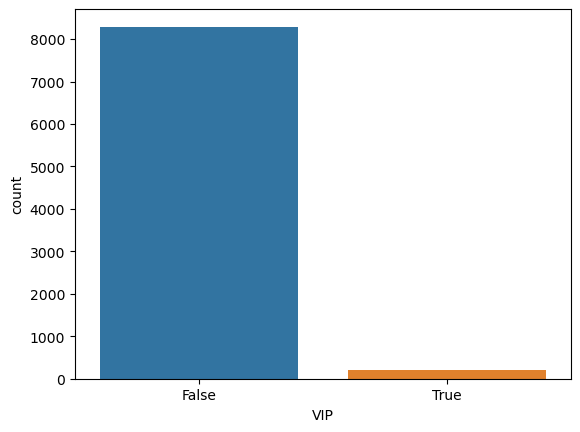

In [46]:
sns.countplot(data=train,x=train['VIP'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

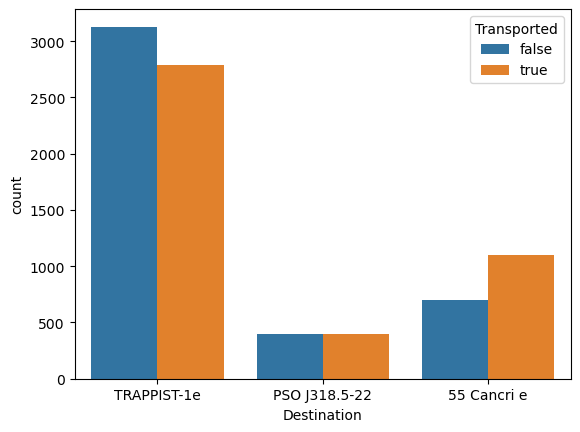

In [47]:
sns.countplot(data=train,x=train['Destination'],hue=train['Transported'])

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

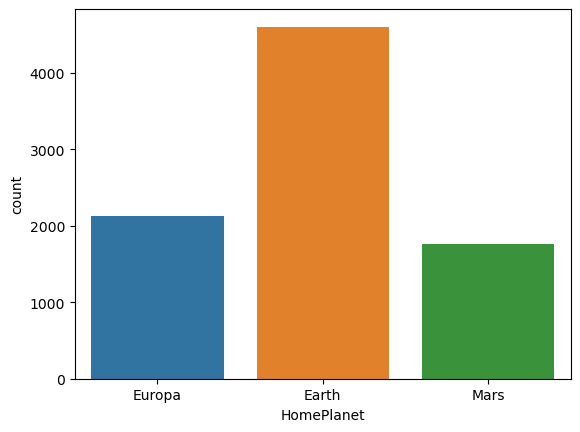

In [48]:
sns.countplot(data=train,x=train['HomePlanet']) #,hue=df['VIP']

<AxesSubplot:xlabel='Transported', ylabel='count'>

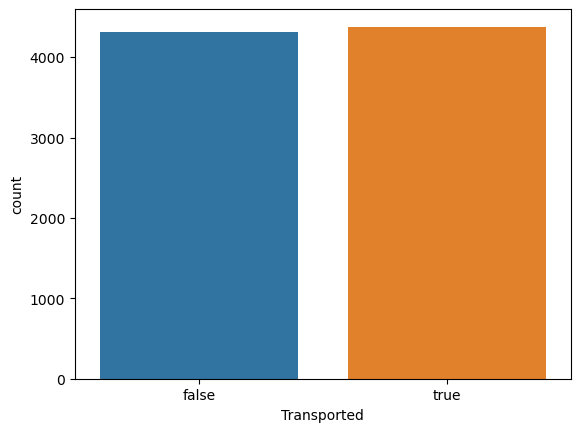

In [49]:
sns.countplot(data=train,x=train['Transported'],)           #hue=df['VIP'] no relation

In [50]:
#sns.countplot(data=train,x=train['Cabin'])

- Cabin has lot of unique values

In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [52]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [53]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


- Merging both train and test for missing values operation

In [54]:
train_len=len(train)
                                    # combine train and test to do all data processing in them together
df=pd.concat([train,test],axis=0)  # axis=0 => row wise concatenation 1=> column wise ie more columns added
df=df.reset_index(drop=True)                 # df is  combination of both train and test
df.head()     

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,false
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,true
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,false
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,false
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,true


In [55]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


- transport is missing in the end b/c test doesn't have Transported column

In [56]:
df.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RoomService'}>],
       [<AxesSubplot:title={'center':'FoodCourt'}>,
        <AxesSubplot:title={'center':'ShoppingMall'}>],
       [<AxesSubplot:title={'center':'Spa'}>,
        <AxesSubplot:title={'center':'VRDeck'}>]], dtype=object)

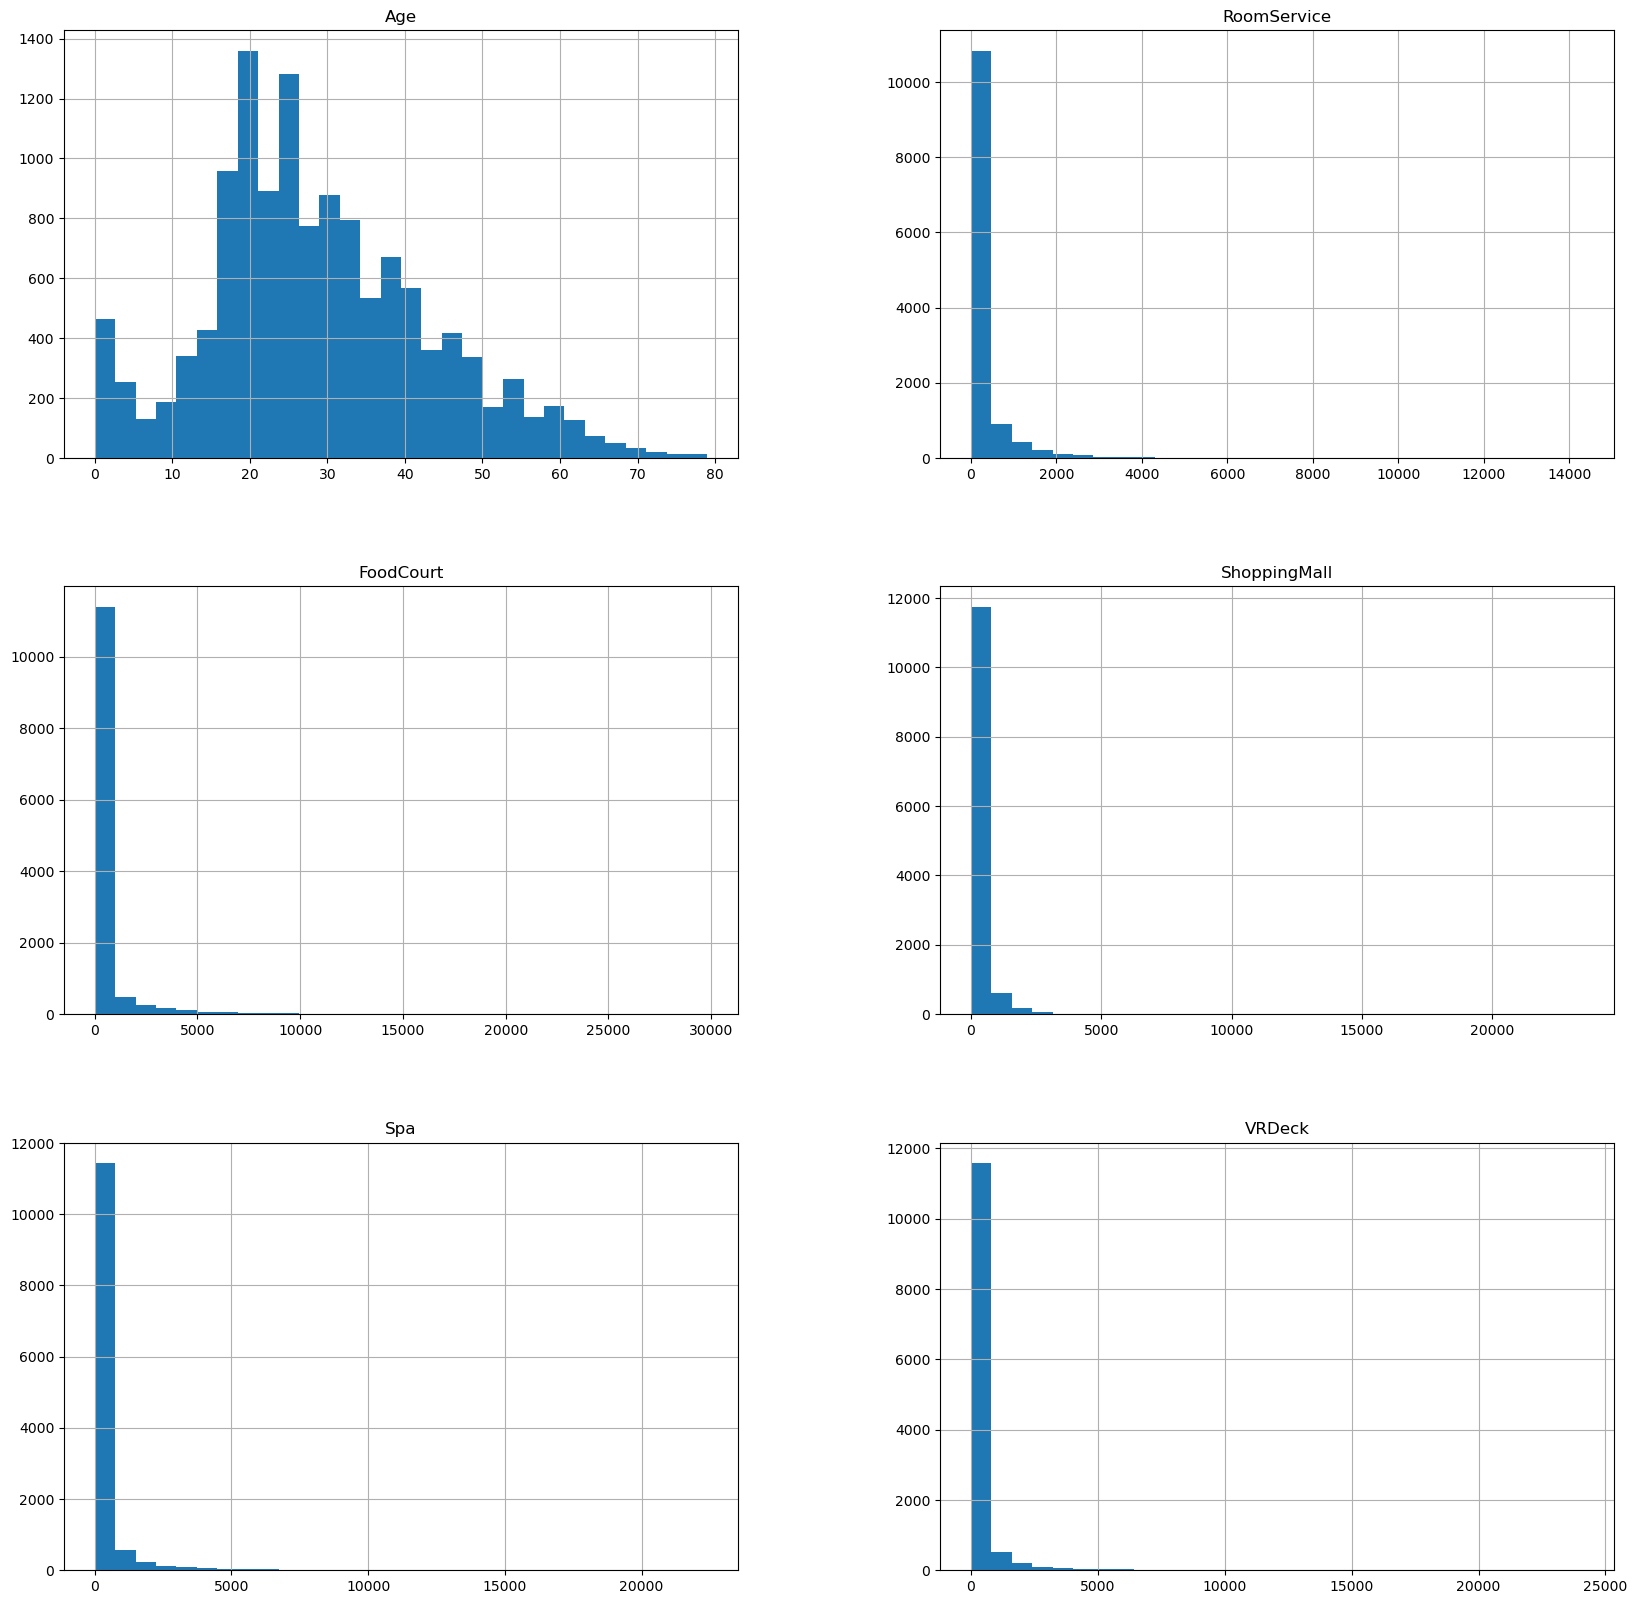

In [57]:
df.hist(bins=30,figsize=(20,20),)

- Highly Left skewed data so must use log transformation to get bell curve (~equal distribution)

#### any transformation only after filling missing values

In [58]:
df.skew()

PassengerId      0.001741
CryoSleep        0.575059
Age              0.440150
VIP              6.592208
RoomService      6.140174
FoodCourt        7.051971
ShoppingMall    11.009090
Spa              7.653169
VRDeck           8.059793
dtype: float64

#removing skewness

In [59]:
df.isnull().sum()
# only Pid ,Transported we have full values

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

<AxesSubplot:xlabel='Spa', ylabel='Count'>

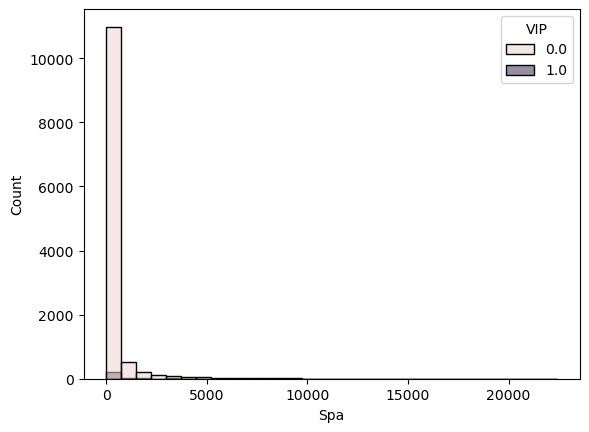

In [64]:
sns.histplot(data=df,x=df['Spa'],bins=30,hue=df['VIP'],color='dark')

<AxesSubplot:xlabel='VIP', ylabel='count'>

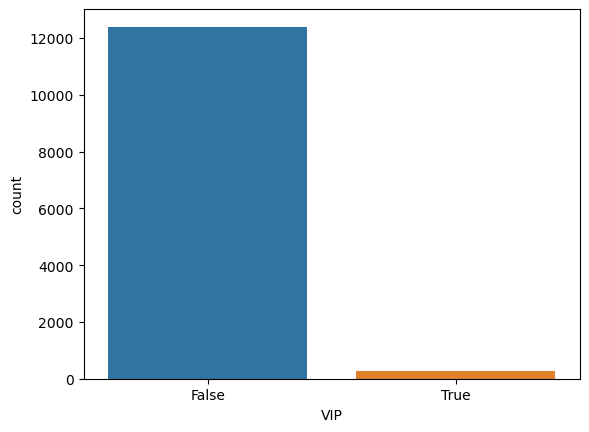

In [63]:
sns.countplot(data=train,x=df['VIP'],)

In [72]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [88]:
train.pivot_table(index='CryoSleep',columns='VIP',values='Spa',aggfunc='max')

VIP,False,True
CryoSleep,,
False,22408.0,13902.0
True,0.0,0.0


In [70]:
len(train)

8693